In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('project4.csv')
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [3]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [4]:
df.tail()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,"15,999"


In [5]:
# Changing the colour name with real colour name:
def simplify_Colour(Colour):
    if "Night Black" in Colour:
        return "Black"
    elif "Azure Blue" in Colour:
        return "Blue"
    elif "Mineral Gray" in Colour:
        return "Gray"
    else:
        return Colour

# The function to create the new column if 'Simplified Colour' doesn't exist
if 'Simplified Colour' not in df.columns:
    df['Simplified Colour'] = df['Colour'].apply(simplify_Colour)



print(df[['Simplified Colour']])

    Simplified Colour
0               Black
1                Blue
2                Gray
3          Royal Blue
4            Marigold
..                ...
536             Cream
537              Cyan
538    Turquoise Cyan
539      Awesome Lime
540          Sky Blue

[541 rows x 1 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         541 non-null    int64  
 1   Model              541 non-null    object 
 2   Colour             541 non-null    object 
 3   Memory             541 non-null    int64  
 4   RAM                541 non-null    int64  
 5   Battery_           541 non-null    int64  
 6   Rear Camera        541 non-null    object 
 7   Front Camera       541 non-null    object 
 8   AI Lens            541 non-null    int64  
 9   Mobile Height      541 non-null    float64
 10  Processor_         541 non-null    object 
 11  Prize              541 non-null    object 
 12  Simplified Colour  541 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.1+ KB


In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
Model,0
Colour,0
Memory,0
RAM,0
Battery_,0
Rear Camera,0
Front Camera,0
AI Lens,0
Mobile Height,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(["Unnamed: 0","Colour"], axis=1 , inplace=True)
df

,Model,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Simplified Colour
0,Infinix SMART 7,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Black
1,Infinix SMART 7,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Blue
2,MOTOROLA G32,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999",Gray
3,POCO C50,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649",Royal Blue
4,Infinix HOT 30i,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Marigold
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999",Cream
537,LAVA Z21,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998",Cyan
538,Tecno Spark 8T,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990",Turquoise Cyan
539,SAMSUNG Galaxy A54 5G,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999",Awesome Lime


In [10]:
df.shape

(541, 11)

In [11]:
df.dtypes

,0
Model,object
Memory,int64
RAM,int64
Battery_,int64
Rear Camera,object
Front Camera,object
AI Lens,int64
Mobile Height,float64
Processor_,object
Prize,object


In [12]:
df.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201
std,60.600694,1.984923,780.148862,0.242911,2.523553
min,16.000000,2.000000,800.000000,0.000000,4.500000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000
max,256.000000,8.000000,7000.000000,1.000000,41.940000


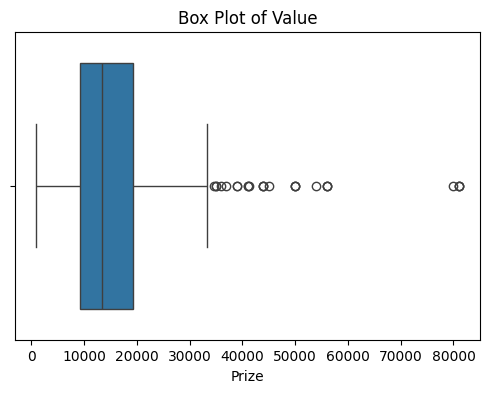

Outliers:
                          Model  Memory  RAM  Battery_ Rear Camera  \
222  SAMSUNG Galaxy S22 Plus 5G     128    8      4500        50MP   
286   SAMSUNG Galaxy Z Flip3 5G     128    8      3300        12MP   
305     MOTOROLA Edge 30 Fusion     128    8      4400        50MP   
308             Google Pixel 7a     128    8      4300        64MP   
309             Google Pixel 7a     128    8      4300        64MP   
327             Google Pixel 7a     128    8      4300        64MP   
396                 vivo V27 5G     256    4      4600        50MP   
400      MOTOROLA Edge 30 Ultra     256    4      4610       200MP   
416              Google Pixel 7     128    8      4270        50MP   
417              Google Pixel 7     128    8      4270        50MP   
419     MOTOROLA Edge 30 Fusion     128    8      4400        50MP   
426              Google Pixel 7     128    8      4270        50MP   
455                   OnePlus 8     256    8      4300        48MP   
465       

In [13]:
# Box plot
plt.figure(figsize=(6,4))
# Convert 'Prize' column to numeric before plotting, handling commas
sns.boxplot(x=pd.to_numeric(df['Prize'].str.replace(',', ''), errors='coerce'))
plt.title('Box Plot of Value')
plt.show()


# Using IQR (Interquartile Range)
# Convert 'Prize' column to numeric before calculations
df['Prize'] = pd.to_numeric(df['Prize'].str.replace(',', ''), errors='coerce')
Q1 = df['Prize'].quantile(0.25)
Q3 = df['Prize'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Prize'] < lower_bound) | (df['Prize'] > upper_bound)]

print("Outliers:")
print(outliers)

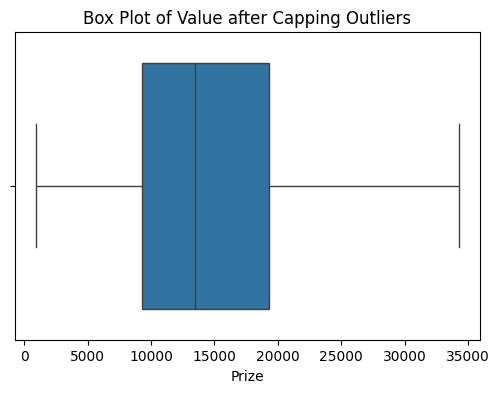

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201,15499.798521
std,60.600694,1.984923,780.148862,0.242911,2.523553,8234.745675
min,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,1.000000,41.940000,34265.000000


In [14]:
# Cap the outliers
df['Prize'] = np.where(df['Prize'] > upper_bound, upper_bound,
                       np.where(df['Prize'] < lower_bound, lower_bound, df['Prize']))

# Verify the capping
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Prize'])
plt.title('Box Plot of Value after Capping Outliers')
plt.show()

df.describe()


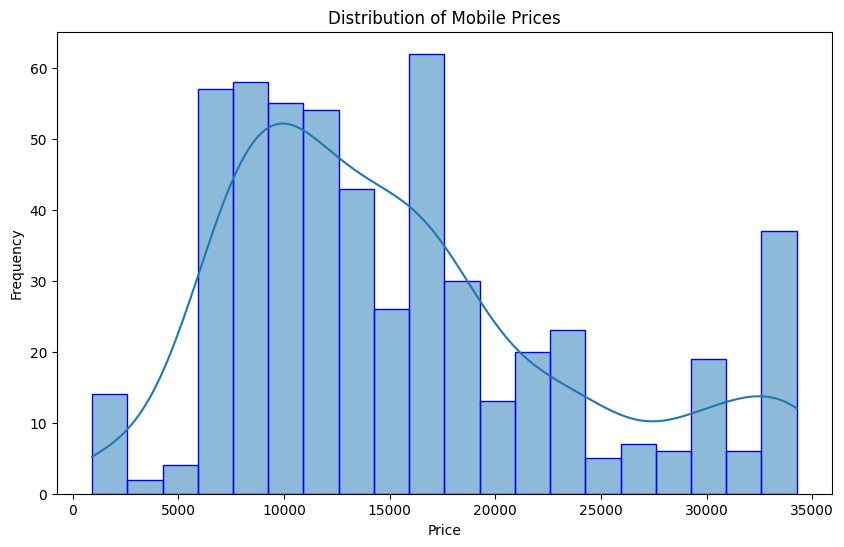

In [15]:
# Univarite analysis for mobile prices
plt.figure(figsize=(10,6))
sns.histplot(df['Prize'], edgecolor = "blue", bins=20, kde=True)
plt.title('Distribution of Mobile Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

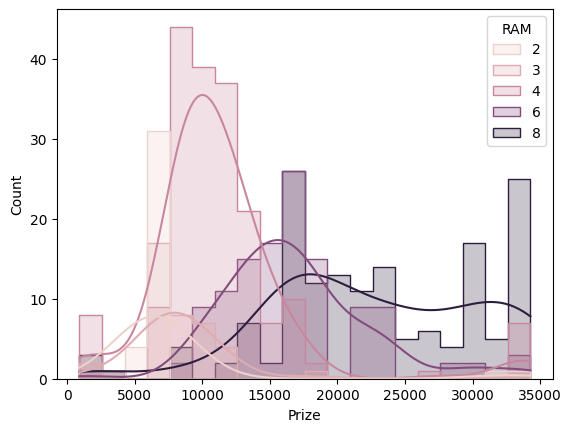

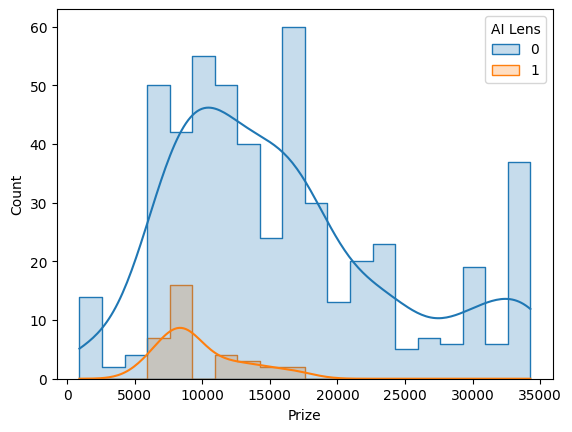

In [16]:
# Histograms for 'RAM' and 'AI Lens'
sns.histplot(data=df, x='Prize', bins=20, kde=True, hue='RAM', element="step")  # Histogram for RAM
plt.show()

sns.histplot(data=df, x='Prize', bins=20, kde=True, hue='AI Lens', element="step")  # Histogram for AI Lens
plt.show()


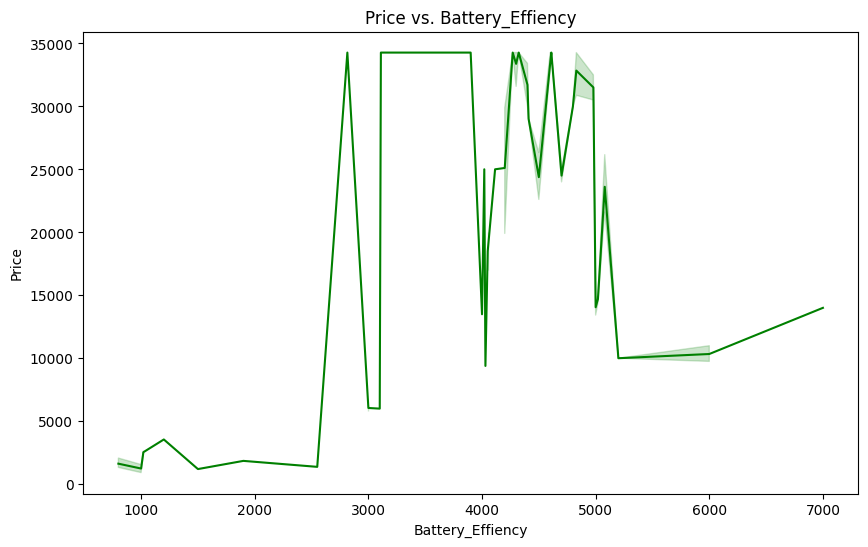

In [17]:
# Explore prices per Battery_Effiency
plt.figure(figsize=(10,6))
sns.lineplot(x='Battery_', y='Prize', data=df, color='green')
plt.title('Price vs. Battery_Effiency')
plt.xlabel('Battery_Effiency')
plt.ylabel('Price')
plt.show()

In [18]:
df.columns

Index(['Model', 'Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera',
       'AI Lens', 'Mobile Height', 'Processor_', 'Prize', 'Simplified Colour'],
      dtype='object')

In [19]:
# Inconsistencies in dataset:-

#  Lowercasing:
if 'Model' in df.columns:
    df['Model'] = df['Model'].str.lower()

# Checking 'Model' column exists before applying replacements
if 'Model' in df.columns:
    df['Model'].replace({'value1': 'new_value1', 'value2': 'new_value2'}, inplace=True)

# Remove leading whitespace and converts to title case
def clean_string(text):
    if isinstance(text, str):
        return text.strip().title()
    return text

# Checked 'Model' column exists before applying clean_string function
if 'Model' in df.columns:
    df['Model'] = df['Model'].apply(clean_string)

# The error and its solution provide valuable insights into data cleaning, one-hot encoding's impact, and
# the importance of robust, adaptable code. These insights can help you write cleaner, more efficient, and
# reliable data processing scripts in future projects.

In [20]:
# The 'Model' and 'Colour' columns exist before one-hot encoding
categorical_cols = []
if 'Model' in df.columns:
    categorical_cols.append('Model')
if 'Colour' in df.columns:
    categorical_cols.append('Colour')

# One-hot encode categorical columns
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# The code snippet ensures that the dataset is properly prepared for
# machine learning by transforming categorical features into a numerical format using one-hot encoding,
# which is crucial for accurate model training and prediction.

Column 'Rear Camera' contains non-numeric values and cannot be directly converted.
Column 'Front Camera' contains non-numeric values and cannot be directly converted.
Column 'Processor_' contains non-numeric values and cannot be directly converted.
Column 'Simplified Colour' contains non-numeric values and cannot be directly converted.
Selected Features: Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height'], dtype='object')


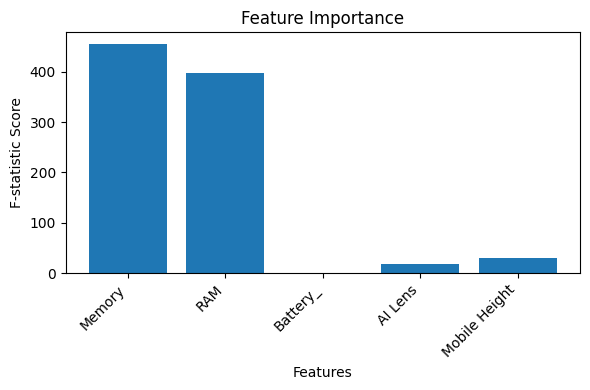

In [21]:
X = df.drop('Prize', axis=1)
y = df['Prize']

# clarify the columns with numeric
num_cols = X.select_dtypes(include=['number']).columns
obj_cols = X.select_dtypes(include=['object']).columns

# Convert object-type columns to numeric
for col in obj_cols:
    try:
        X[col] = pd.to_numeric(X[col], errors='raise')
    except ValueError:
        print(f"Column '{col}' contains non-numeric values and cannot be directly converted.")


# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[num_cols])
X_scaled = pd.DataFrame(X_scaled, columns=num_cols, index=X.index)

# Feature selection
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X_scaled, y)

# Indices and names of the select features
selected_feature_indices = selector.get_support(indices=True)
selected_features = num_cols[selected_feature_indices]

print("Selected Features:", selected_features)

# Visualization
feature_importances = selector.scores_
plt.figure(figsize=(6,4))
plt.bar(selected_features, feature_importances[selected_feature_indices])
plt.xlabel("Features")
plt.ylabel("F-statistic Score")
plt.title("Feature Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Addressing the data type issue and applyed appropriate preproces techniques,
# The code provides a more robust and accurate method for identifying the most relevant features impacting mobile phone prices.
# For better model building and potentially more accurate price predictions.
# The combination of feature scaling and selection enhances the interpretability and performance of the analysis.

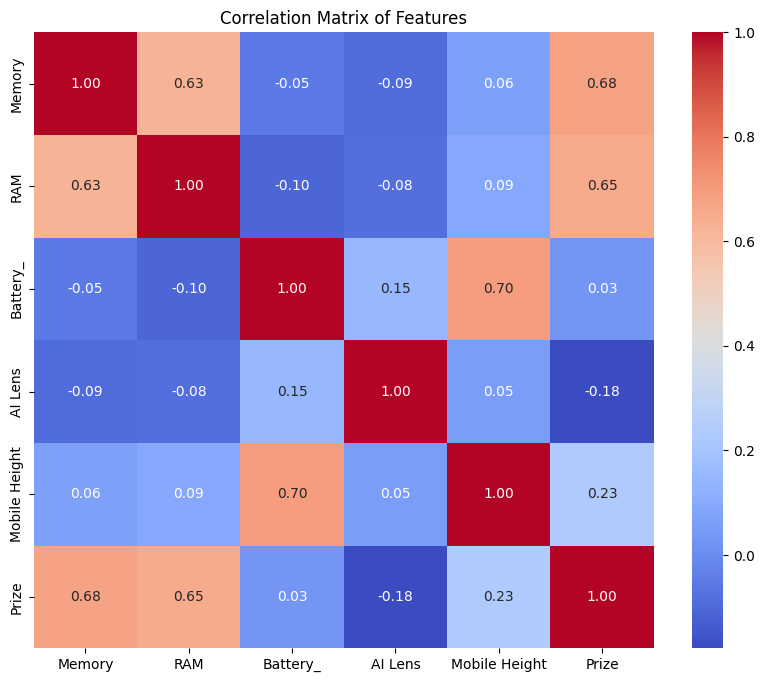

In [22]:
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Insights on Correlation:

# Strength of Relationships: The heatmap visually represents the correlation coefficients between different features.
# Values closer to 1 indicate a strong positive correlation, values closer to -1 indicate a strong negative correlation,
# and values near 0 suggest a weak or no linear relationship.
# Feature Importance: By examining the correlations between features and the target variable ('Prize'),
# we can identify # features that have a strong influence on the price.  For example, a high positive correlation between a feature and the 'Prize' # suggests that as the feature value increases, the price tends to increase as well. # 3. Multicollinearity: The correlation matrix helps identify potential multicollinearity issues, where two or more features are highly # correlated with each other.
# High correlations among predictor variables can make it difficult to determine the individual impact
# of each feature on the target variable and can also destabilize some statistical models.

In [23]:
X = df.drop('Prize', axis=1)
y = df['Prize']

# Clarifying the columns with numeric and object types
num_cols = X.select_dtypes(include=['number']).columns
obj_cols = X.select_dtypes(include=['object']).columns

# Convert object-type columns to numeric, handling non-numeric values
for col in obj_cols:
    try:
        # Attempt to convert to numeric, replacing non-numeric with NaN
        X[col] = pd.to_numeric(X[col], errors='coerce')
    except ValueError:
        print(f"Column '{col}' contains non-numeric values and cannot be directly converted.")

# Impute NaN values with 0
X = X.fillna(0)


# Spliting the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialized and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [24]:
# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

# The trained model to make predictions on unseen data and
# then evaluates the accuracy of these predictions using MAE and RMSE.
# These metrics help to understand how well the model is likely to perform on new, unseen data.

Mean Absolute Error (MAE): 1257.0233626765691
Root Mean Squared Error (RMSE): 2813.6135031071244
R-squared (R2): 0.8643685111546865


In [25]:
# Using Decision Tree Reggessor

from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression - Mean Absolute Error (MAE): {mae_dt}")
print(f"Decision Tree Regression - Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"Decision Tree Regression - R-squared (R2): {r2_dt}")


Decision Tree Regression - Mean Absolute Error (MAE): 939.7779816513762
Decision Tree Regression - Root Mean Squared Error (RMSE): 3118.3670397627825
Decision Tree Regression - R-squared (R2): 0.8333957358378643


In [26]:
# Svr model reggessor

from sklearn.svm import SVR

# Initializing and train the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluating the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - Mean Absolute Error (MAE): {mae_svr}")
print(f"Support Vector Regression - Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"Support Vector Regression - R-squared (R2): {r2_svr}")


Support Vector Regression - Mean Absolute Error (MAE): 3226.8292081882387
Support Vector Regression - Root Mean Squared Error (RMSE): 4969.99428771455
Support Vector Regression - R-squared (R2): 0.5768021729789197


In [27]:
# Gradient boost reggessor

from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # You can tune hyperparameters
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression - Mean Absolute Error (MAE): {mae_gb}")
print(f"Gradient Boosting Regression - Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"Gradient Boosting Regression - R-squared (R2): {r2_gb}")


Gradient Boosting Regression - Mean Absolute Error (MAE): 1907.5692332681162
Gradient Boosting Regression - Root Mean Squared Error (RMSE): 2864.149448438074
Gradient Boosting Regression - R-squared (R2): 0.8594525402862996


In [28]:
# K neighbour reggessor

from sklearn.neighbors import KNeighborsRegressor
# Initializing and train the KNeighborsRegressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluating the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Regression - Mean Absolute Error (MAE): {mae_knn}")
print(f"K-Nearest Neighbors Regression - Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"K-Nearest Neighbors Regression - R-squared (R2): {r2_knn}")


K-Nearest Neighbors Regression - Mean Absolute Error (MAE): 2200.8018348623855
K-Nearest Neighbors Regression - Root Mean Squared Error (RMSE): 3443.7769562507488
K-Nearest Neighbors Regression - R-squared (R2): 0.7968103036798007


In [29]:
# Compared all model reggessor and give output which is better to continue:
# As i have already trained and evaluated the models as in the provided code

models = {
    'Random Forest': {'mae': mae, 'rmse': rmse, 'r2': r2},
    'Decision Tree': {'mae': mae_dt, 'rmse': rmse_dt, 'r2': r2_dt},
    'SVR': {'mae': mae_svr, 'rmse': rmse_svr, 'r2': r2_svr},
    'Gradient Boosting': {'mae': mae_gb, 'rmse': rmse_gb, 'r2': r2_gb},
    'KNN': {'mae': mae_knn, 'rmse': rmse_knn, 'r2': r2_knn}
}

# Model with the best R-squared score
best_model = max(models, key=lambda k: models[k]['r2'])
print(f"The best model based on R-squared is: {best_model}")
print(f"R-squared score: {models[best_model]['r2']}")


The best model based on R-squared is: Random Forest
R-squared score: 0.8643685111546865


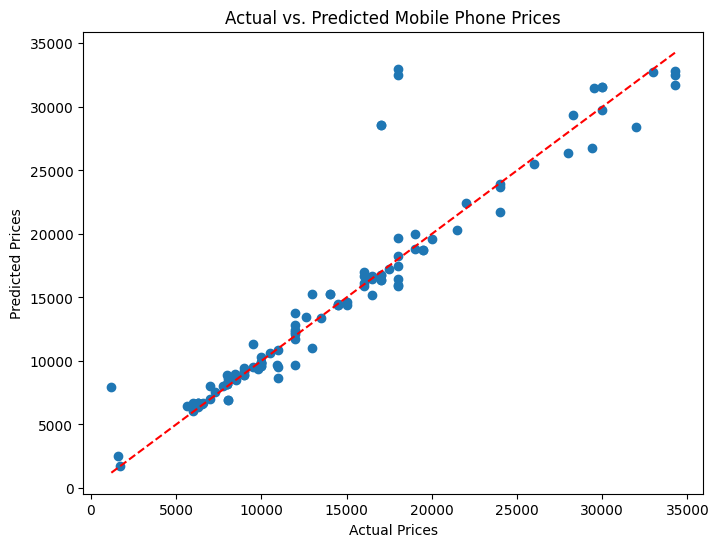

In [30]:
# Predicted vs. Actual Prices Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Mobile Phone Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()

In [31]:
df.to_csv(r'C:\Users\RAJUK\OneDrive\Desktop\project_4.csv')